
This script is used to compare the tds.run() and tds.itm_step() functions of andes. 

## Imports

In [47]:
import sys
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path

# Move one level higher
sys.path.append(str(Path.cwd().parents[0]))
import andes as ad
from andes.routines.tds import TDS

# Set plotter use
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

## Setup system

NOTE: Be carfeul becuase it needs to be re-executed when jumping from tds.run() to tds.itm_step() or opposite direction.

In [55]:
# Load system
system = ad.load(ad.get_case("kundur/kundur_full_compare.json"))
system.files.no_output = True

system.PQ.config.p2p = 1.0
system.PQ.config.p2i = 0.0
system.PQ.config.p2z = 0.0
# system.PQ.pq2z = 0

system.PFlow.run()

# TDS setup
tds = TDS(system)
tds.config.fixt = 1
tds.config.shrinkt = 0
tds.config.tstep = 0.1
tds.config.tf = 10.0
tds.t = 0.0
tds.init()

# Logging
time_history = []
omega_history = [[] for _ in range(len(system.GENROU))]
Ppf_history = [[] for _ in range(len(system.PQ))]

## tds.itm_step() 

Simulation finished.


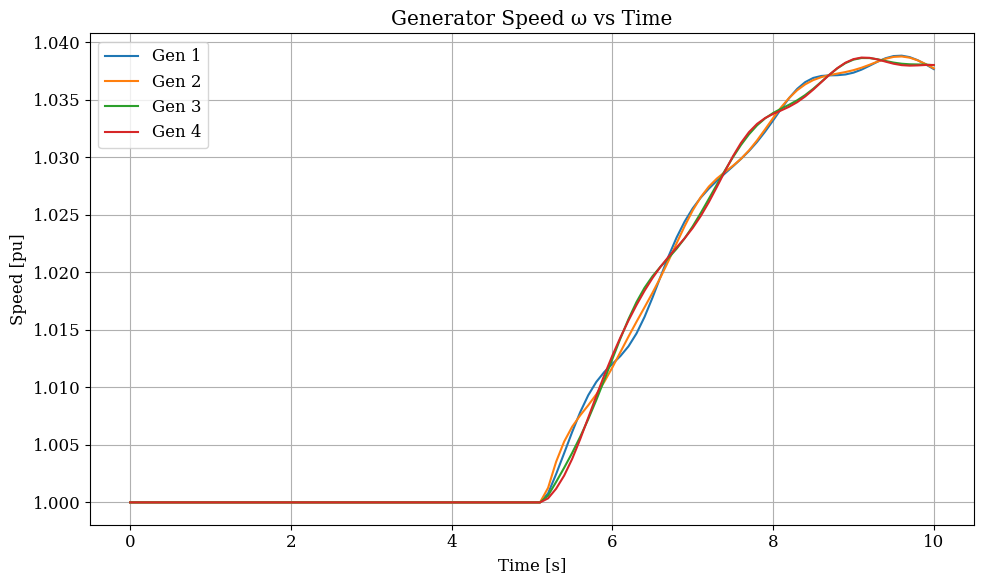

In [56]:
###################### TDS_step test ######################
one = True
# Step-by-step simulation
while tds.t < tds.config.tf:

    if tds.t > 5.0 and one == True:
        system.PQ.set(src='Ppf', idx='PQ_0', attr='v', value=5.0)
        one = False

    # Log current state
    time_history.append(tds.t)
    for i in range(len(system.GENROU)):
        omega_history[i].append(system.GENROU.omega.v[i])
    for i in range(len(system.PQ)):
        Ppf_history[i].append(system.PQ.Ppf.v[i])

    # Advance one time step
    tds.itm_step()
    tds.t += tds.config.tstep

print("Simulation finished.")

# Plot
plt.figure(figsize=(10, 6))
for i, omega in enumerate(omega_history):
    plt.plot(time_history, omega, label=f'Gen {i+1}')
plt.xlabel("Time [s]")
plt.ylabel("Speed [pu]")
plt.title("Generator Speed ω vs Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

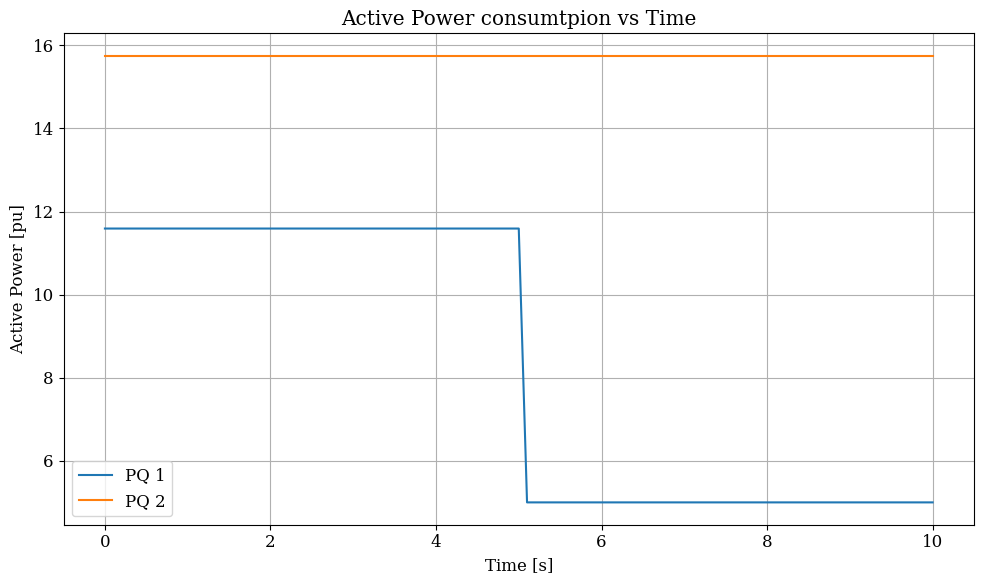

In [57]:
# Plot
plt.figure(figsize=(10, 6))
for i, Ppf in enumerate(Ppf_history):
    plt.plot(time_history, Ppf, label=f'PQ {i+1}')
plt.xlabel("Time [s]")
plt.ylabel("Active Power [pu]")
plt.title("Active Power consumtpion vs Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## tds.run()

  0%|          | 0/100 [00:00<?, ?%/s]

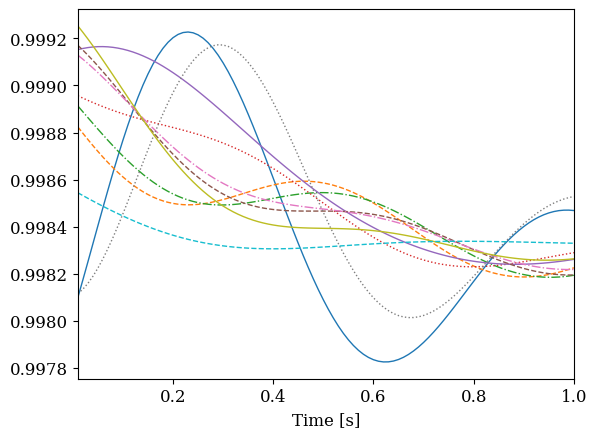

Plot saved to tests/test_plots/test_tds_omega.png


In [ ]:
###################### TDS test ######################
tds.run()
system.TDS.load_plotter()